In [1]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

#Time Series
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loading 2017 Bitcoin price

In [2]:
dates = pd.date_range('2017-01-01', '2017-10-04')
df = pd.DataFrame(index=dates)
df_temp = pd.read_csv('BCHARTS-HITBTCUSD.csv', index_col='Date',parse_dates=True, na_values=['nan'])
df = df.join(df_temp)
df.head()


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2017-01-01,962.04,995.00,959.71,995.00,9.16,9071.1353,990.298614
2017-01-02,993.00,1038.00,992.68,1008.25,13.13,13399.9869,1020.562597
2017-01-03,1019.90,1027.83,1018.00,1021.72,0.79,804.8431,1018.788734
2017-01-04,1034.16,1124.23,1034.16,1118.11,11.82,13041.2002,1103.316430
2017-01-05,1093.80,1125.00,920.90,999.99,3.58,3747.7465,1046.856564


In [3]:
df.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02,277.000000
mean,2160.575523,2243.257004,2071.104368,2172.923791,584.345271,2.115862e+06,2162.049787
std,1190.242027,1232.474623,1131.110954,1193.142752,921.201730,3.588787e+06,1183.412821
min,802.000000,819.780000,650.000000,750.000000,0.020000,2.455880e+01,786.046709
25%,1087.560000,1135.000000,1068.940000,1113.590000,2.520000,2.670335e+03,1104.822156
50%,1891.670000,1992.870000,1819.980000,1917.450000,92.770000,1.969835e+05,1906.097659
75%,2785.410000,2885.710000,2658.280000,2786.580000,1273.560000,3.288424e+06,2759.614994
max,4895.100000,4975.000000,4662.170000,4893.760000,6400.830000,2.169308e+07,4781.239465


Stock price plotting function

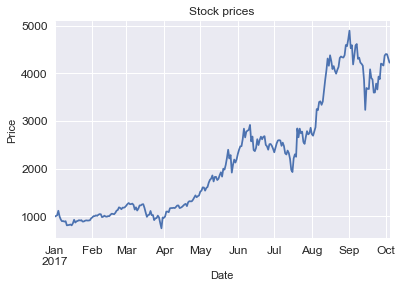

In [4]:
def plot_data(df, title="Stock prices",xlabel="Date", ylabel="Price"):

    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() 
plot_data(df['Close'])
    

In [5]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window,center=False).mean()
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window, center=False).std()
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band


Calculation of rolling mean and std deviation. Plot with Bollinger bands.

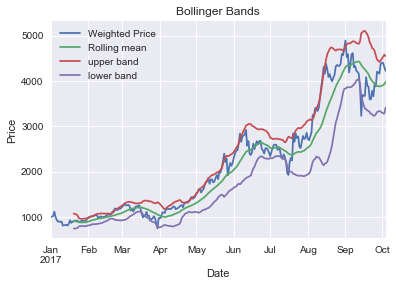

In [6]:
# 1. Compute rolling mean
rm = get_rolling_mean(df['Close'], window=20)

# 2. Compute rolling standard deviation
rstd = get_rolling_std(df['Close'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = df['Close'].plot(title="Bollinger Bands", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()
    

Daily return plot

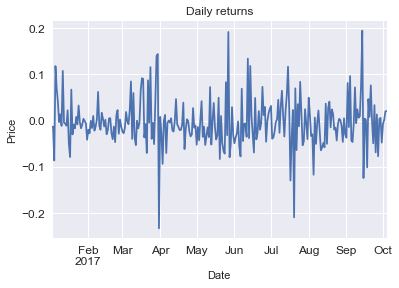

In [7]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    df_w = df['Close']
    daily_returns = df_w[:-1].values / df_w[1:] - 1
    return daily_returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

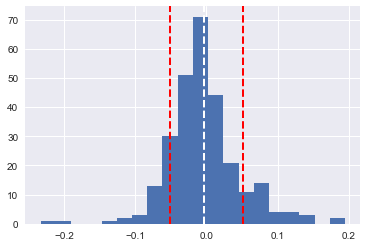

Kurtosis: 3.35682114083


In [8]:
mean = daily_returns.mean()
std = daily_returns.std()
daily_returns.hist(bins=20)
plt.axvline(mean,color='w',linestyle = 'dashed',linewidth=2)
plt.axvline(std,color='r',linestyle = 'dashed',linewidth=2)
plt.axvline(-std,color='r',linestyle = 'dashed',linewidth=2)
plt.show()
print('Kurtosis:', daily_returns.kurtosis())

Financial traditional plot (including volume) 

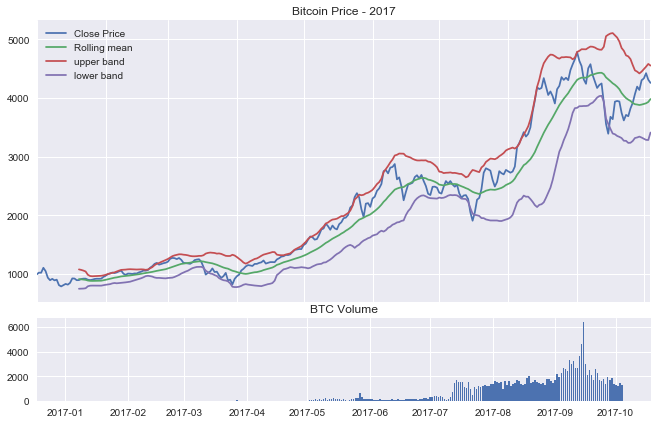

In [9]:
plt.rcParams['figure.figsize'] = 11, 7

main = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = df['Weighted Price'].plot(title="Bollinger Bands", label='Close Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

main.axes.xaxis.set_ticklabels([])

plt.title('Bitcoin Price - 2017')
plt.legend()

vol = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
vol.bar(df.index, df['Volume (BTC)'])

plt.title('BTC Volume')

# savefig('img.png', bbox_inches='tight', transparent=True)

Calculate log returns

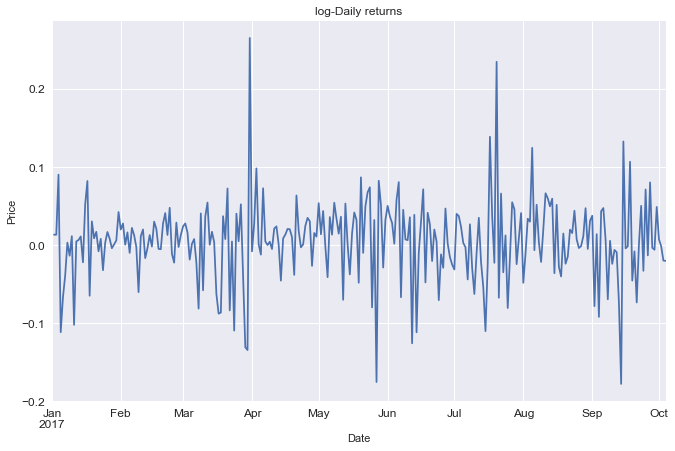

In [10]:
log_returns = np.log(df['Close'].pct_change()+1)
plot_data(log_returns, title="log-Daily returns", ylabel="log-Daily returns")

Cumulative returns (daily & monthly)

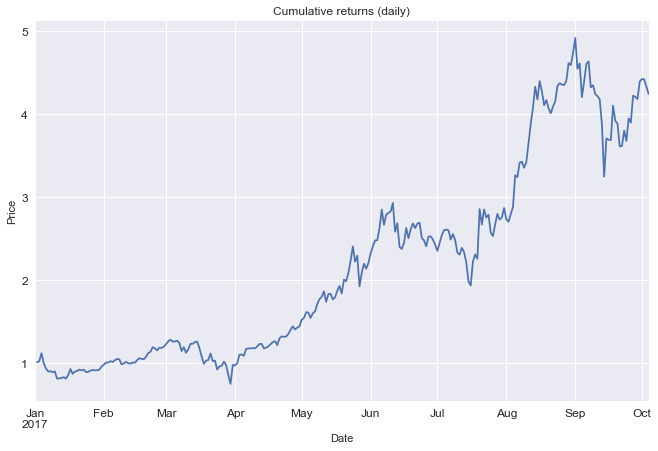

In [11]:
daily_pct_change = df['Close'].pct_change()
cum_return_daily = (1+daily_pct_change).cumprod()
plot_data(cum_return_daily,title='Cumulative returns (daily)')

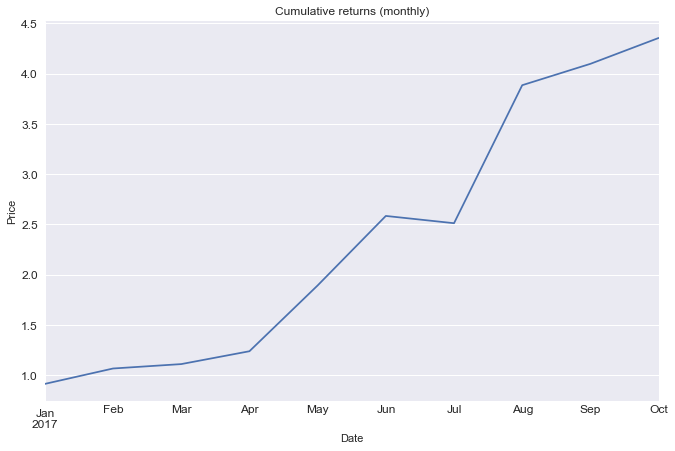

In [12]:
daily_pct_change = df['Close'].pct_change()
cum_return_monthly = cum_return_daily.resample('M').mean()
plot_data(cum_return_monthly,title='Cumulative returns (monthly)')

# Momentum Strategy

Momentum strategies are based on the belief that the current trend will keep (either upward or downward), so it's convenient to follow the movement.

First implementation will be a moving average crossover: If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

### Simple Moving Average


In [13]:
# Window selection
short_window = 10
long_window = 60

# Signal initialization
signals = pd.DataFrame(index = df.index)
signals['signal'] = 0.0

# Short MA
signals['short_ma'] = df['Close'].rolling(window = short_window, min_periods=1,center=False).mean()

# Long MA
signals['long_ma'] = df['Close'].rolling(window = long_window, min_periods=1,center=False).mean()

# Signals
signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                          > signals['long_ma'][short_window:], 1.0, 0.0)

# Trading orders
signals['positions'] = signals['signal'].diff()

print(signals)

            signal     short_ma      long_ma  positions
2017-01-01     0.0   995.000000   995.000000        NaN
2017-01-02     0.0  1001.625000  1001.625000        0.0
2017-01-03     0.0  1008.323333  1008.323333        0.0
2017-01-04     0.0  1035.770000  1035.770000        0.0
2017-01-05     0.0  1028.614000  1028.614000        0.0
2017-01-06     0.0  1013.011667  1013.011667        0.0
2017-01-07     0.0   996.737143   996.737143        0.0
2017-01-08     0.0   984.881250   984.881250        0.0
2017-01-09     0.0   974.296667   974.296667        0.0
2017-01-10     0.0   966.845000   966.845000        0.0
2017-01-11     0.0   948.580000   952.800000        0.0
2017-01-12     0.0   929.366000   941.409167        0.0
2017-01-13     0.0   909.329000   932.173846        0.0
2017-01-14     0.0   880.564000   924.908571        0.0
2017-01-15     0.0   861.788000   917.396667        0.0
2017-01-16     0.0   853.863000   913.543750        0.0
2017-01-17     0.0   856.846000   914.448235    

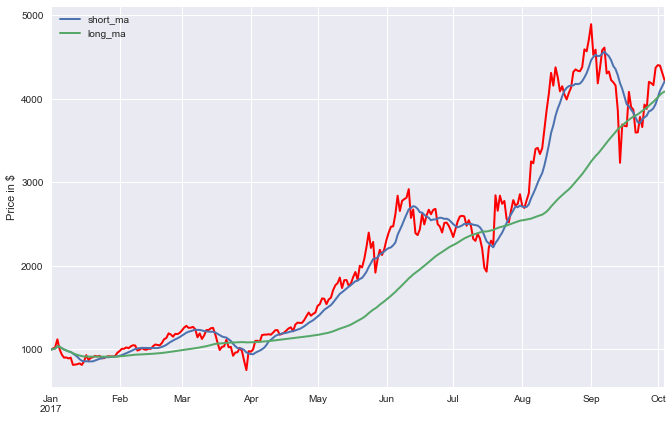

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_ma', 'long_ma']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_ma[signals.positions == 1.0],
         'X', markersize=100, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_ma[signals.positions == -1.0],
         '^', markersize=100, color='k')
         
plt.show()

In [15]:
# Window selection
short_window = 10
long_window = 60

# Signal initialization
bollinger_signals = pd.DataFrame(index = df.index)
bollinger_signals['signal'] = 0.0

# Short MA
bollinger_signals['upper'] = upper_band

# Long MA
bollinger_signals['lower'] = lower_band

# Signals
bollinger_signals['buy'] = np.where((df['Close']>= bollinger_signals['lower']) & (df['Close'].shift(-1)<bollinger_signals['lower']), 1.0, 0.0)
bollinger_signals['sell'] = np.where((df['Close']<= bollinger_signals['upper']) & (df['Close'].shift(-1)>bollinger_signals['upper']), -1.0, 0.0)
# Trading orders
bollinger_signals['positions'] = bollinger_signals['buy']-bollinger_signals['sell']

print(bollinger_signals)

            signal        upper        lower  buy  sell  positions
2017-01-01     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-02     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-03     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-04     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-05     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-06     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-07     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-08     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-09     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-10     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-11     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-12     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-13     0.0          NaN          NaN  0.0   0.0        0.0
2017-01-14     0.0          NaN          NaN  0.0   0.0       

In [16]:
print(bollinger_signals['buy'].sum())
print(bollinger_signals['sell'].sum())


8.0
-25.0


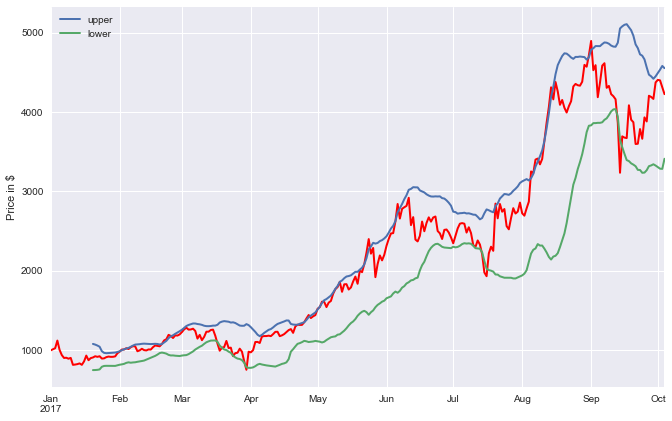

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
bollinger_signals[['upper', 'lower']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(bollinger_signals.loc[bollinger_signals.buy == 1.0].index, 
         bollinger_signals.upper[bollinger_signals.buy == 1.0],
         'X', markersize=100, color='m')
         
# Plot the sell signals
ax1.plot(bollinger_signals.loc[bollinger_signals.sell == -1.0].index, 
         bollinger_signals.lower[bollinger_signals.sell == -1.0],
         '^', markersize=100, color='k')
         
plt.show()

## Backtesting

In [18]:
# Set initial capital (US$)
initial_capital= float(100000.0)

# Create positions
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy 100 BTC
positions['BTC'] = 100*signals['signal']   
  
# Initialize portfolio 
portfolio = positions.multiply(df['Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df['Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail())

                 BTC  holdings      cash     total   returns
2017-09-30       0.0       0.0  283965.0  283965.0  0.000000
2017-10-01       0.0       0.0  283965.0  283965.0  0.000000
2017-10-02  439683.0  439683.0 -155718.0  283965.0  0.000000
2017-10-03  431011.0  431011.0 -155718.0  275293.0 -0.030539
2017-10-04  422357.0  422357.0 -155718.0  266639.0 -0.031436


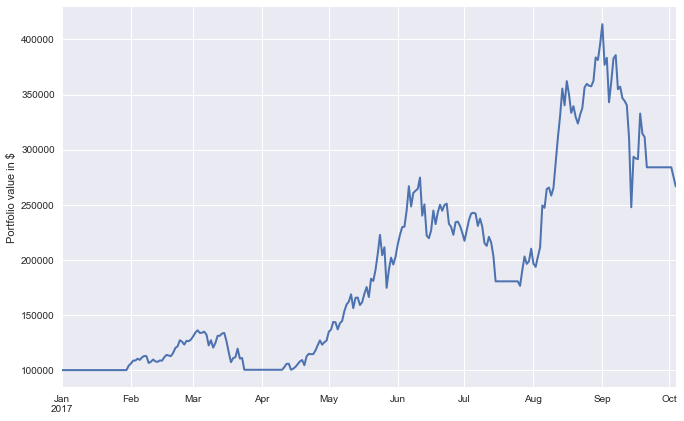

In [19]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

Bollinger Bands Backtesting


In [20]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)#Create an "empty" column as placeholder for our /position signals
df['Position'] = None
 



/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


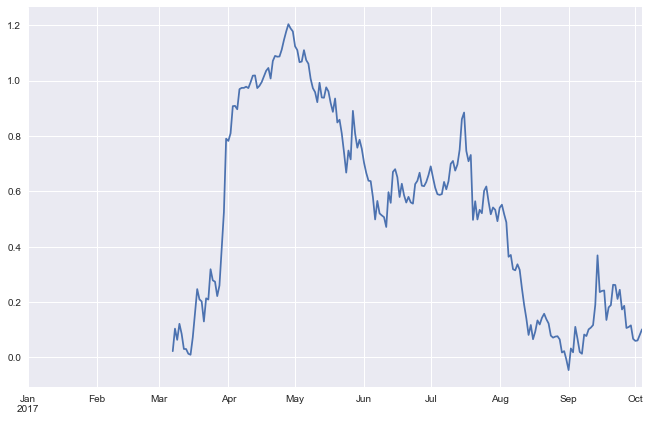

In [44]:
#Create an "empty" column as placeholder for our /position signals
df['Position'] = None
 
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(df)):
 
    if (df['Close'].iloc[row] < df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger High'].iloc[row-1]):
        df['Position'].iloc[row] = -1
 
    if (df['Close'].iloc[row] > df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger Low'].iloc[row-1]):
        df['Position'].iloc[row] = 1  
 
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['Position'].fillna(method='ffill',inplace=True)
 
#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Position']
 
#Plot the strategy returns
df['Strategy Return'].cumsum().plot()

We will create a function to run different windows for the Bollinger Bands backtesting

In [45]:
def bollinger_strat(df,window,std):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()
 
    df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
 
    df['Short'] = None
    df['Long'] = None
    df['Position'] = None
 
    for row in range(len(df)):
 
        if (df['Close'].iloc[row] < df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger High'].iloc[row-1]):
            df['Position'].iloc[row] = -1
 
        if (df['Close'].iloc[row] > df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger Low'].iloc[row-1]):
            df['Position'].iloc[row] = 1
 
    df['Position'].fillna(method='ffill',inplace=True)
 
    df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy Return'] = df['Market Return'] * df['Position']
 
    df['Strategy Return'].cumsum().plot()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


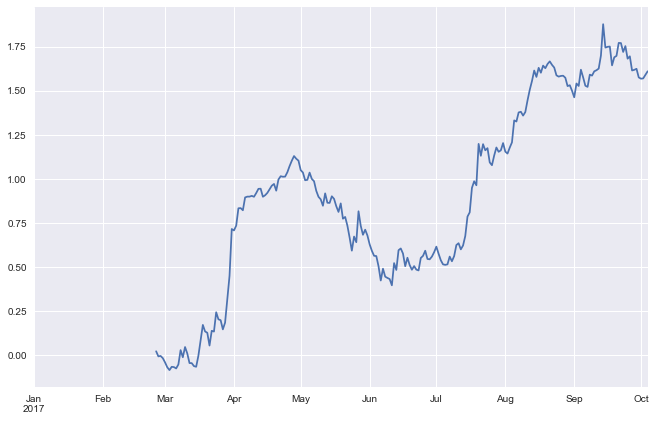

In [46]:
bollinger_strat(df,50,2)

It seems that a window of 50 days is the most reasonable. Even though, it has high volatility.

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


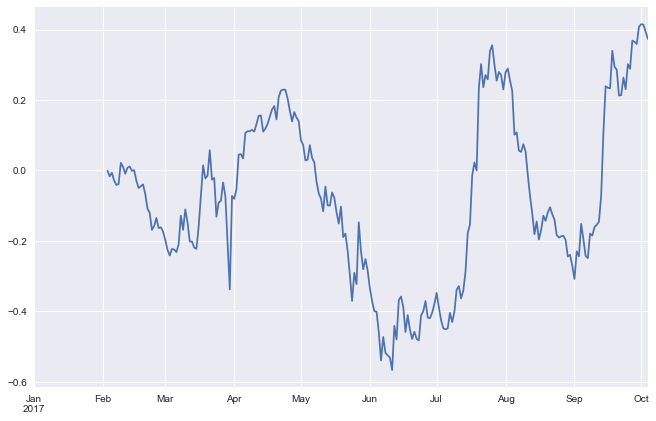

In [47]:
bollinger_strat(df,20,2)

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


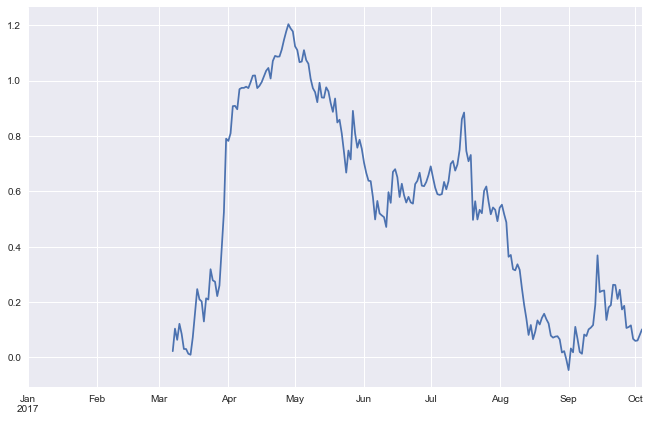

In [48]:
bollinger_strat(df,60,2)

## Time Series Analysis for BTC

First, lets define the basic TS analysis components plot:

In [26]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

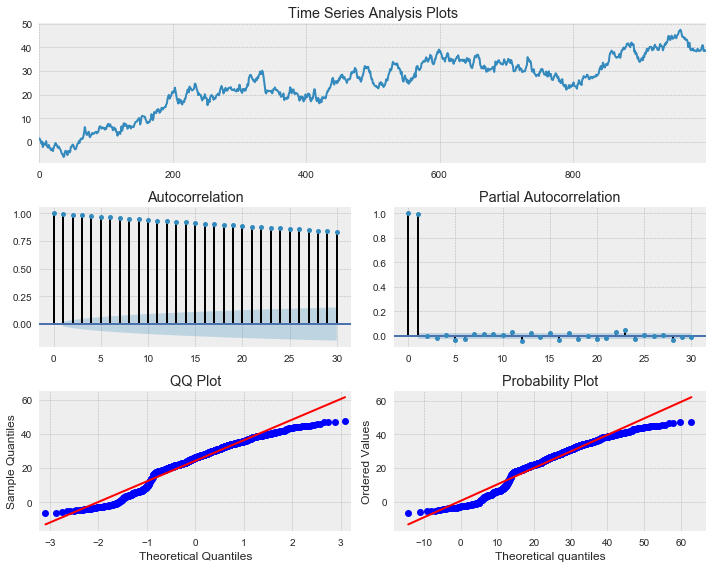

In [27]:
np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

In [28]:
ts=df['Close']

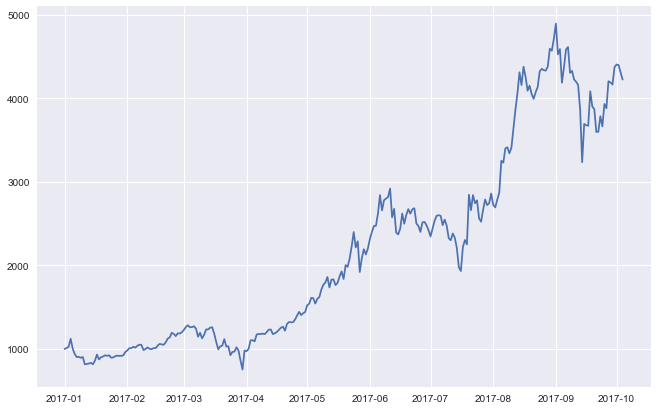

In [29]:
plt.plot(ts)

### Rolling statistics and Dickey-Fuller

In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


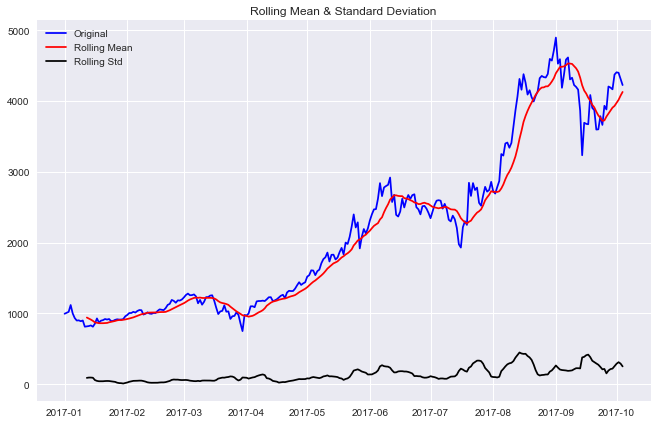

Results of Dickey-Fuller Test:
Test Statistic                  -0.014286
p-value                          0.957335
#Lags Used                       4.000000
Number of Observations Used    272.000000
Critical Value (1%)             -3.454622
Critical Value (5%)             -2.872225
Critical Value (10%)            -2.572464
dtype: float64


In [31]:
test_stationarity(ts)

Let's make a trend and seasonality analysis. First, we define a logarithmic transformation to inspect trends.

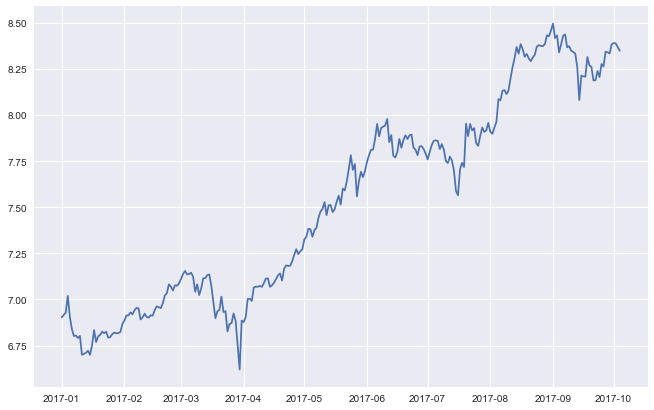

In [32]:
log_ts = np.log(ts)
plt.plot(log_ts)

Define differentiation

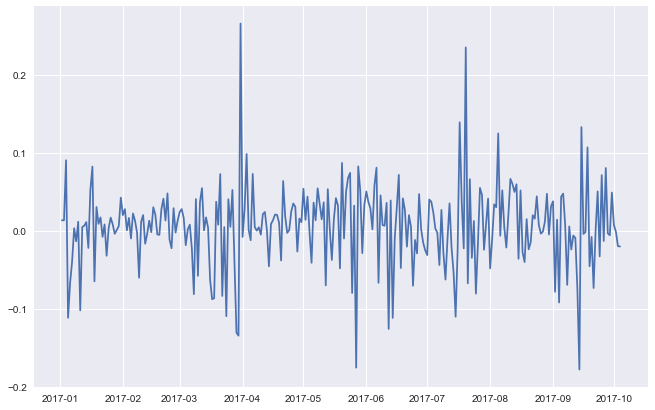

In [33]:
ts_log_diff = log_ts - log_ts.shift()
plt.plot(ts_log_diff)

We can see an upward trend, but its clearly non-linear. Let's apply a decomposition for the series, to analyze all the components.

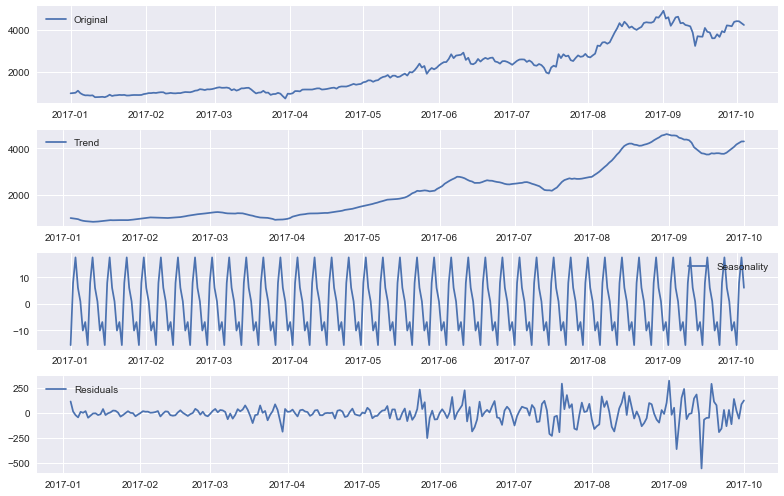

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

We can see an increase in the residuals. Considering that the volatility of the returns increses throughout the time, we can see that the residuals of the decomposition increase as well. We have to take into consideration this fact once we try to fit a model. Let's plot ACF and PACF to see what model could fit better. 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


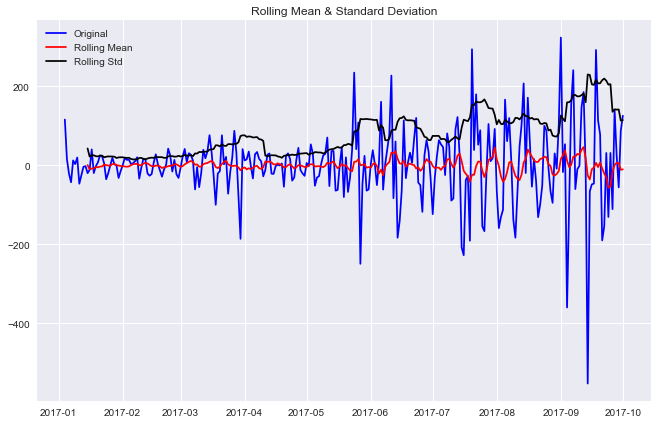

Results of Dickey-Fuller Test:
Test Statistic                -7.479979e+00
p-value                        4.800887e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.570000e+02
Critical Value (1%)           -3.456054e+00
Critical Value (5%)           -2.872853e+00
Critical Value (10%)          -2.572799e+00
dtype: float64


In [35]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

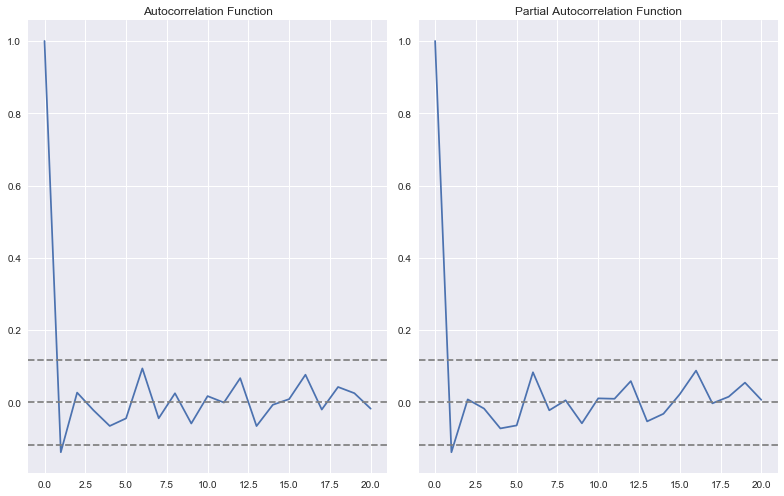

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from numpy.linalg import LinAlgError

ts_log_diff.dropna(inplace=True)
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ywmle')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

[Insert conclusion on ACF/PACF]

Let's fit an integrated AR(2) model.

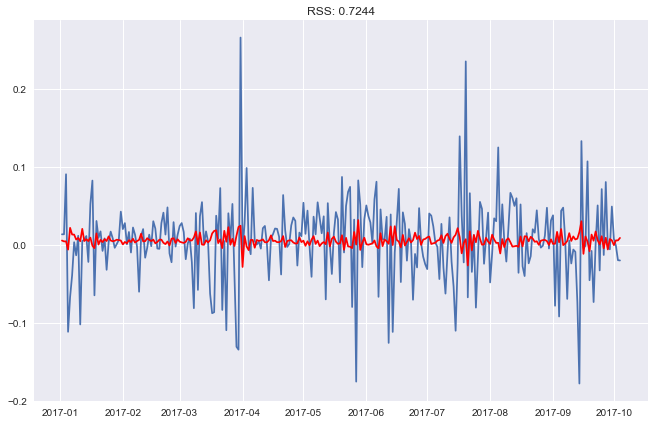

In [37]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(log_ts, order=(3, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Now let's try to fit an integrated MA(2) model.

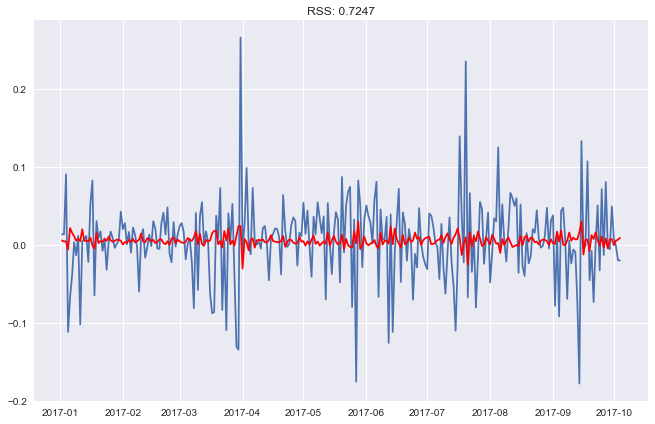

In [38]:
model = ARIMA(log_ts, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Now lets fit an ARIMA(2,1,2) model.

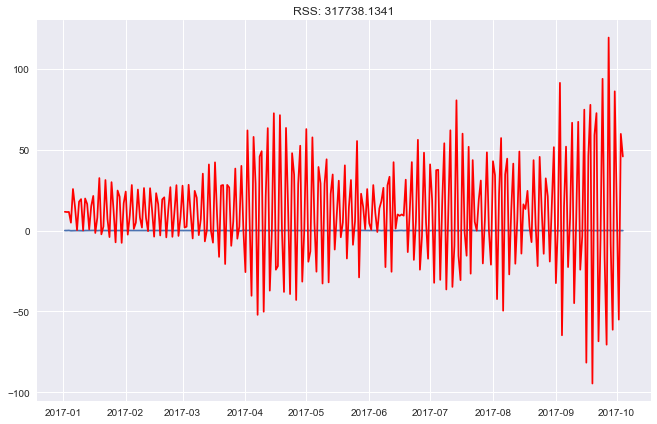

In [39]:
model = ARIMA(ts, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2017-01-02     11.606981
2017-01-03     11.471195
2017-01-04     11.526444
2017-01-05      4.884356
2017-01-06     25.711204
2017-01-07     14.686978
2017-01-08      0.265955
2017-01-09     17.862265
2017-01-10     19.463670
2017-01-11      0.086081
2017-01-12     19.850795
2017-01-13     16.449330
2017-01-14      0.706335
2017-01-15     15.146570
2017-01-16     21.438327
2017-01-17     -1.494143
2017-01-18      7.964646
2017-01-19     32.470476
2017-01-20     -2.326626
2017-01-21      2.486428
2017-01-22     31.263272
2017-01-23      7.202487
2017-01-24     -4.028114
2017-01-25     29.963446
2017-01-26     12.757639
2017-01-27     -7.255664
2017-01-28     24.770736
2017-01-29     20.920535
2017-01-30     -7.579348
2017-01-31     16.938975
                 ...    
2017-09-05     14.825735
2017-09-06     51.912668
2017-09-07    -22.560289
2017-09-08      7.704662
2017-09-09     66.686349
2017-09-10    -44.894756
2017-09-11      6.100252
2017-09-12     67.273939
2017-09-13    -24.186835


In [41]:
predictions_ARIMA_log = pd.Series(log_ts.ix[0], index=log_ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log)

2017-01-01       6.902743
2017-01-02      18.509724
2017-01-03      29.980919
2017-01-04      41.507363
2017-01-05      46.391720
2017-01-06      72.102924
2017-01-07      86.789902
2017-01-08      87.055857
2017-01-09     104.918121
2017-01-10     124.381791
2017-01-11     124.467872
2017-01-12     144.318667
2017-01-13     160.767997
2017-01-14     161.474333
2017-01-15     176.620902
2017-01-16     198.059229
2017-01-17     196.565086
2017-01-18     204.529732
2017-01-19     237.000208
2017-01-20     234.673582
2017-01-21     237.160009
2017-01-22     268.423282
2017-01-23     275.625769
2017-01-24     271.597654
2017-01-25     301.561100
2017-01-26     314.318739
2017-01-27     307.063075
2017-01-28     331.833811
2017-01-29     352.754346
2017-01-30     345.174998
                 ...     
2017-09-05    2870.748459
2017-09-06    2922.661127
2017-09-07    2900.100838
2017-09-08    2907.805500
2017-09-09    2974.491849
2017-09-10    2929.597092
2017-09-11    2935.697345
2017-09-12  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


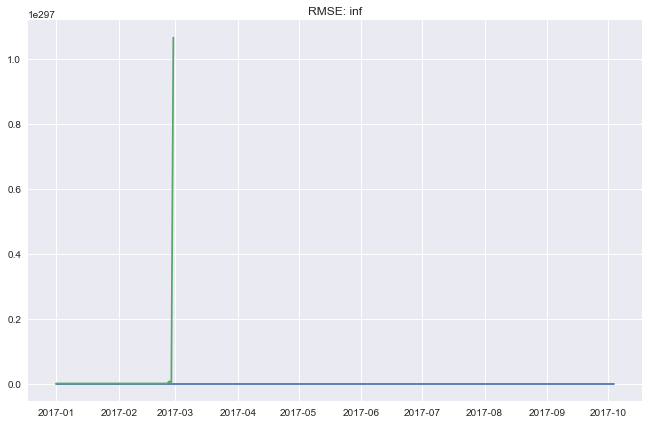

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### GARCH Model

Now we are going to try to fit an ARCH model, and explore different configurations (t-garch,s-garch,garch,etc.)

In [43]:
from arch import arch_model
print(ts)
garch11 = arch_model(ts, p=1, q=1)
res = garch11.fit(update_freq=10)
print(res.summary())

2017-01-01     995.00
2017-01-02    1008.25
2017-01-03    1021.72
2017-01-04    1118.11
2017-01-05     999.99
2017-01-06     935.00
2017-01-07     899.09
2017-01-08     901.89
2017-01-09     889.62
2017-01-10     899.78
2017-01-11     812.35
2017-01-12     816.11
2017-01-13     821.35
2017-01-14     830.46
2017-01-15     812.23
2017-01-16     855.75
2017-01-17     928.92
2017-01-18     870.50
2017-01-19     897.30
2017-01-20     905.14
2017-01-21     920.60
2017-01-22     913.23
2017-01-23     920.55
2017-01-24     891.32
2017-01-25     894.08
2017-01-26     909.12
2017-01-27     916.55
2017-01-28     912.83
2017-01-29     913.53
2017-01-30     919.00
               ...   
2017-09-05    4370.52
2017-09-06    4582.64
2017-09-07    4613.19
2017-09-08    4303.45
2017-09-09    4326.91
2017-09-10    4223.82
2017-09-11    4197.28
2017-09-12    4158.62
2017-09-13    3862.54
2017-09-14    3232.98
2017-09-15    3691.48
2017-09-16    3675.75
2017-09-17    3669.90
2017-09-18    4082.96
2017-09-19